In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv("./data/ETH.csv")
#df = pd.read_csv("./data/VIX.csv")
df = pd.read_csv("./data/yusen.csv")

In [3]:
#解析にボラティリティを使いたいので追加
df["vol"] = df["close"]/df["close"].shift()

In [4]:
df

,time,open,high,low,close,Plot,Plot.1,Plot.2,Plot.3,Plot.4,...,Lagging Span,Leading Span A,Leading Span B,Developing Poc,Developing VA High,Developing VA Low,Volume,Volume MA,RSI,vol
0,1639958400,2813.33052,2839.99716,2766.66390,2783.33055,2655.330678,2777.752413,2532.908943,2900.174147,2410.487209,...,NaN,NaN,NaN,NaN,NaN,NaN,14466914,18761598.30,57.381095,NaN
1,1640044800,2833.33050,2859.99714,2806.66386,2849.99715,2671.663995,2797.138524,2546.189466,2922.613053,2420.714937,...,NaN,NaN,NaN,NaN,NaN,NaN,15385515,18666408.20,60.927795,1.023952
2,1640131200,2866.66380,2873.33046,2786.66388,2849.99715,2689.330644,2813.792026,2564.869262,2938.253409,2440.407879,...,NaN,NaN,NaN,NaN,NaN,NaN,16651816,18940353.45,60.927795,1.000000
3,1640217600,2869.99713,2933.33040,2853.33048,2929.99707,2710.663956,2837.950033,2583.377879,2965.236110,2456.091802,...,NaN,NaN,NaN,NaN,NaN,NaN,22021222,19590769.10,64.983324,1.028070
4,1640304000,2933.33040,2963.33037,2886.66378,2923.33041,2733.997266,2855.211372,2612.783160,2976.425478,2491.569054,...,NaN,NaN,NaN,NaN,NaN,NaN,17627417,19783369.30,64.383591,0.997725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1678147200,3563.00000,3572.00000,3504.00000,3560.00000,3392.100000,3536.809329,3247.390671,3681.518659,3102.681341,...,NaN,NaN,NaN,3208.625,3615.50,2910.25,12469800,13015050.00,65.462405,0.994413
296,1678233600,3535.00000,3577.00000,3513.00000,3571.00000,3410.950000,3553.159520,3268.740480,3695.369039,3126.530961,...,NaN,NaN,NaN,3208.625,3615.50,2910.25,12028900,12898060.00,66.062380,1.003090
297,1678320000,3591.00000,3635.00000,3583.00000,3634.00000,3433.550000,3573.476579,3293.623421,3713.403158,3153.696842,...,NaN,NaN,NaN,3208.625,3615.50,2910.25,12817200,13209070.00,69.346737,1.017642
298,1678406400,3620.00000,3669.00000,3381.00000,3395.00000,3442.800000,3573.450144,3312.149856,3704.100287,3181.499713,...,NaN,NaN,NaN,3208.625,3615.50,2910.25,44369400,15057800.00,49.697504,0.934232


In [5]:
class Wallet:

    yen = 0
    eth = 0
    history = pd.DataFrame()
    
    def __init__(self, yen, eth):
        self.yen = yen
        self.eth = eth
    
    def portfolio(self):
        self.history = pd.concat([self.history, pd.Series([self.value(), self.yen, self.eth, self.eth * close/self.value(), self.yen/self.value()])], axis=1)
        
    def say_portfolio(self):
        print("yen = " + str(self.yen))
        print("\n")
        print("eth = " + str(self.eth))

    def value(self):
        return self.yen + self.eth * close
    
    def buy(self, buy_amount):
        if((self.yen - buy_amount) >= 0):
            self.eth = self.eth + buy_amount/close
            self.yen = self.yen - buy_amount
        else:
            print("cannot buy because of short of yen")
        
    def sell(self, sell_amount):
        if((self.eth - sell_amount/close) >= 0):
            self.eth = self.eth - sell_amount
            self.yen = self.yen + sell_amount * close
        else:
            print("cannot buy because of short of ETH")

# ここからfor文を回して実行

In [6]:
"""
wallet = Wallet(1, 0)

for i, row in df.iterrows():
    close = row["close"]
    if(row["vol"] > 0.95):
        wallet.buy(wallet.yen/10)
    elif(row["vol"] < 1.05):
        wallet.sell(wallet.eth/10)

    wallet.portfolio()"""

'\nwallet = Wallet(1, 0)\n\nfor i, row in df.iterrows():\n    close = row["close"]\n    if(row["vol"] > 0.95):\n        wallet.buy(wallet.yen/10)\n    elif(row["vol"] < 1.05):\n        wallet.sell(wallet.eth/10)\n\n    wallet.portfolio()'

In [7]:
wallet = Wallet(1, 0)

wallet = Wallet(1, 0)
for i, row in df.iterrows():
    close = row["close"]
    if(row["RSI"] < 30):
        wallet.buy(wallet.yen/10)
    elif(row["RSI"] > 70):
        wallet.sell(wallet.eth/10)

    wallet.portfolio()

Text(0, 0.5, 'total value')

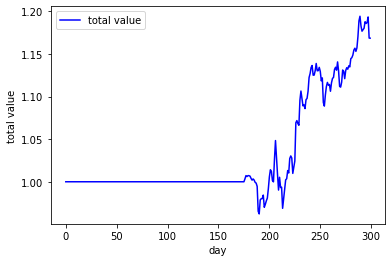

In [8]:
plt.plot(df.index, wallet.history.T[0], color = "blue", label = "total value")
#plt.plot(df.index, df["vol"], color = "red", label = "volatility")
#plt.plot(df.index, wallet.history.T[4])

#plt.plot(df.index, df["RSI"]/100, color = "red", label = "RSI/100")
plt.legend()
plt.xlabel("day")
plt.ylabel("total value")

In [9]:
plt.plot(range(0,100), result)
plt.xlabel('RSI')
plt.ylabel('value')

NameError: name 'result' is not defined